# Modelling 

In [1]:
import pandas as pd
# library for train test split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, regularizers,initializers
from sklearn.model_selection import StratifiedKFold 
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

C:\Users\ASUS\OneDrive\Dokumen\Praktikum KB\venv_B1-20\Krisdt_064\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\OneDrive\Dokumen\Praktikum KB\venv_B1-20\Krisdt_064\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ASUS\OneDrive\Dokumen\Praktikum KB\venv_B1-20\Krisdt_064\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
dataset = pd.read_csv('dataset_bersih.csv')

In [3]:
dataset

,Unnamed: 0,Comment,Category Comment,Target_type
0,0,the people who liked this comment is officiall...,neutral,0
1,1,lets be honest this wasnt your recommendation ...,neutral,0
2,2,million comments if you find mine your legend,positive,1
3,3,the ones who are not from tik tok can like thi...,negative,2
4,4,the first viewer must feel like the king of th...,positive,1
...,...,...,...,...
1718,1718,never really liked this song but the meme like...,negative,2
1719,1719,no nudes no drugs no alcohol just some meme ma...,negative,2
1720,1720,this sounds so weird without the wii shop musi...,negative,2
1721,1721,if you mess with me like rohan once did youre ...,negative,2


In [4]:
del dataset['Unnamed: 0']

In [5]:
dataset

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1718,never really liked this song but the meme like...,negative,2
1719,no nudes no drugs no alcohol just some meme ma...,negative,2
1720,this sounds so weird without the wii shop musi...,negative,2
1721,if you mess with me like rohan once did youre ...,negative,2


In [6]:
X = dataset['Comment'].values
y = dataset['Target_type'].values
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8)

In [7]:
print(f'Bentuk X_train = {X_train.shape}',
      f'Bentuk Y_train = {y_train.shape}',
      f'Bentuk X_val = {X_val.shape}',
      f'Bentuk Y_val = {y_val.shape}',
      f'Bentuk X_test = {X_test.shape}',
      f'Bentuk Y_test = {y_test.shape}', sep="\n")

Bentuk X_train = (1033,)
Bentuk Y_train = (1033,)
Bentuk X_val = (345,)
Bentuk Y_val = (345,)
Bentuk X_test = (345,)
Bentuk Y_test = (345,)


In [8]:
NUM_WORDS = 1000 #15000

tokenizer = Tokenizer(num_words=NUM_WORDS)
# tokenizer.fit_on_texts(X_train)
word_index = tokenizer.fit_on_texts(X_train)

In [9]:
tokenizer

In [10]:
x_train_token = tokenizer.texts_to_sequences(X_train)
x_test_token = tokenizer.texts_to_sequences(X_test)
x_val_token =tokenizer.texts_to_sequences(X_val)

In [11]:
MAXLEN = 250

x_train_padding = pad_sequences(x_train_token, maxlen=MAXLEN, padding='post', truncating='post')
x_test_padding = pad_sequences(x_test_token, maxlen=MAXLEN, padding='post', truncating='post')
x_valdding_padding = pad_sequences(x_val_token, maxlen=MAXLEN, padding='post', truncating='post')
embeding_dim = 16

In [12]:
import numpy as np

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [13]:
y_train

array([1, 2, 1, ..., 0, 1, 0], dtype=int64)

In [14]:
model = tf.keras.Sequential([
    Embedding(input_dim=NUM_WORDS, input_length=MAXLEN, output_dim=20),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 20)           20000     
                                                                 
 global_max_pooling1d (Globa  (None, 20)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 24)                504       
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 20,579
Trainable params: 20,579
Non-trainable params: 0
_________________________________________________________________


In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [16]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>= 0.96):
      print("\nAkurasi validasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = MyCallback()

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
EPOCHS = 30
BATCH_SIZE = 32
history = model.fit(x_train_padding,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_valdding_padding, y_val),
                    verbose=1,
                    callbacks = early_stopping)

Epoch 1/30
33/33 [==============================] - 3s 43ms/step - loss: 1.0694 - accuracy: 0.4637 - val_loss: 1.0612 - val_accuracy: 0.4493
Epoch 2/30
33/33 [==============================] - 1s 22ms/step - loss: 1.0335 - accuracy: 0.4666 - val_loss: 1.0375 - val_accuracy: 0.4493
Epoch 3/30
33/33 [==============================] - 1s 29ms/step - loss: 0.9929 - accuracy: 0.5237 - val_loss: 1.0056 - val_accuracy: 0.5217
Epoch 4/30
33/33 [==============================] - 1s 23ms/step - loss: 0.9320 - accuracy: 0.6225 - val_loss: 0.9553 - val_accuracy: 0.5942
Epoch 5/30
33/33 [==============================] - 1s 26ms/step - loss: 0.8408 - accuracy: 0.7241 - val_loss: 0.8826 - val_accuracy: 0.6609
Epoch 6/30
33/33 [==============================] - 1s 21ms/step - loss: 0.7287 - accuracy: 0.7551 - val_loss: 0.8042 - val_accuracy: 0.6696
Epoch 7/30
33/33 [==============================] - 1s 15ms/step - loss: 0.6243 - accuracy: 0.7638 - val_loss: 0.7411 - val_accuracy: 0.6812
Epoch 8/30
33

In [19]:
model.evaluate(x_test_padding, y_test)

11/11 [==============================] - 0s 15ms/step - loss: 0.8381 - accuracy: 0.7507


[0.8381303548812866, 0.7507246136665344]

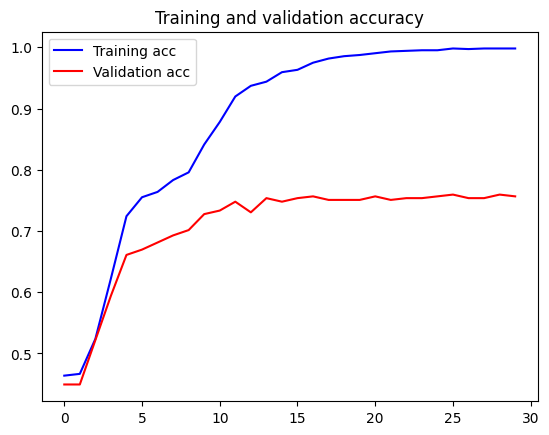

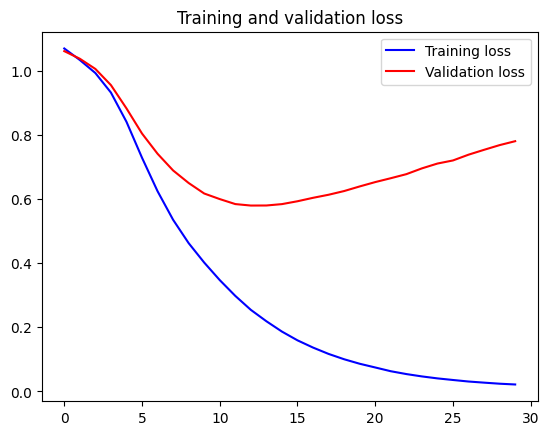

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [21]:
model.save('./model/model1.h5')

# PREDICT

In [22]:
text = input("Write Your Comment Bellow : ")
predict_sentences = tokenizer.texts_to_sequences([text])
predict_padded = pad_sequences(predict_sentences, maxlen=250)
label = model.predict(predict_padded)[0][1]

if label <= 0.4:
    print(f"Your Comment is : Negative ({label})")
elif label >= 0.7:
    print(f"Your Comment is : Positive ({label})")
elif label < 0.7 and label >= 0.5:
    print(f"Your Comment is : Neutral ({label})")

Write Your Comment Bellow : i love your song
1/1 [==============================] - 0s 282ms/step
Your Comment is : Positive (0.9973734617233276)
